<a href="https://colab.research.google.com/github/yenlung/Python-AI-Book/blob/main/%E5%86%92%E9%9A%AA%E5%89%AF%E6%9C%AC05_%E5%92%8C_AI_PK_%E7%9C%8B%E8%AA%B0%E6%AF%94%E8%BC%83%E6%9C%83%E8%AA%8D_IVE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. 安裝 DeepFace 套件

In [1]:
!pip install -U tensorflow-probability
!pip install typing-extensions --upgrade
!pip install gradio
!pip install langchain
!pip install deepface

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 17.2 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-probability
    Found existing installation: tensorflow-probability 0.22.0
    Uninstalling tensorflow-probability-0.22.0:
      Successfully uninstalled tensorflow-probability-0.22.0
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
    Uninstalling typing_extensions-4.5.0:
      Successfully uninstalled typing_extensions-4.5.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 110.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.9/92.9 kB 13.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.7/302.7 kB 35.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 381.9/381

使用之前我們學過的人臉辨識, 來跟 AI PK 辨識韓國 K-POP 女團 IVE 或其他任何你想 PK 的團體。

另外, Colab 加入 AI 輔助功能, 寫到不會的地方, 還可以問 Colab 哦。

In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
from deepface import DeepFace
from PIL import Image
import gradio as gr
import os

### 2. 創造資料夾

你想創造的成員, 用逗號隔開。

In [4]:
members = "兪真유진,員瑛원영,秋天가을,Liz리즈,Rei레이,李瑞이서".split(',')

In [5]:
members

['兪真유진', '員瑛원영', '秋天가을', 'Liz리즈', 'Rei레이', '李瑞이서']

In [6]:
# prompt: 建立 photos 資料夾, 並為上面 members 串列中毎個都建一個資料夾。

for member in members:
    os.makedirs(f'./photos/{member}', exist_ok=True)


In [7]:
photo_folder = "/content/photos/"

請在各資料夾中, 至少放入一張照片。以下是簡單的秀圖函式。

In [8]:
def show_image(*args):
    k = len(args)
    fig = plt.figure(figsize=(5*k, 5))
    for i, photo in enumerate(args):
        plt.subplot(1,k,i+1)
        plt.axis('off')
        plt.axis('equal')
        img = Image.open(photo)
        plt.imshow(img)

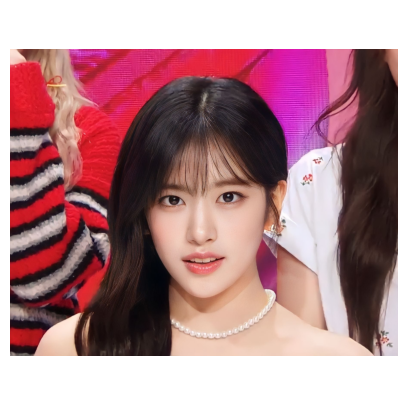

In [9]:
img_path = photo_folder + "兪真유진/yujin.jpg"
show_image(img_path)

### 3. 建立測試照片

建一個 `test` 資料夾, 放測試照片。

In [10]:
# prompt: 建一個 "test" 資料夾

os.makedirs('./test', exist_ok=True)


In [11]:
test_folder = "/content/test/"

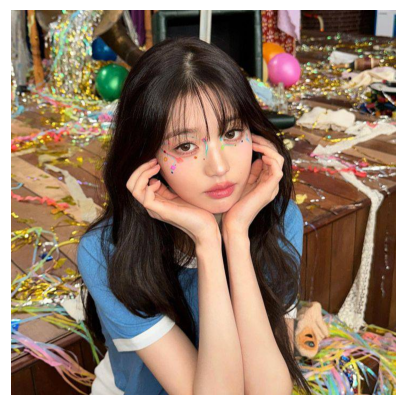

In [12]:
img = test_folder + "test01.jpg"
show_image(img)

這裡會把一張照片, 去和 `db_path` 資料夾下所有照片比對, 看最像誰。

In [13]:
df = DeepFace.find(img, db_path=photo_folder,
                   enforce_detection=False)

Finding representations:   0%|          | 0/6 [00:00<?, ?it/s]

vgg_face_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/vgg_face_weights.h5
To: /root/.deepface/weights/vgg_face_weights.h5

  0%|          | 0.00/580M [00:00<?, ?B/s]
  0%|          | 1.57M/580M [00:00<00:47, 12.2MB/s]
  1%|          | 4.19M/580M [00:00<00:29, 19.2MB/s]
  2%|▏         | 9.44M/580M [00:00<00:17, 32.8MB/s]
  3%|▎         | 19.9M/580M [00:00<00:09, 59.4MB/s]
  7%|▋         | 40.9M/580M [00:00<00:04, 111MB/s] 
 14%|█▍        | 82.3M/580M [00:00<00:02, 210MB/s]
 23%|██▎       | 131M/580M [00:00<00:01, 296MB/s] 
 28%|██▊       | 163M/580M [00:00<00:01, 305MB/s]
 35%|███▍      | 202M/580M [00:00<00:01, 330MB/s]
 43%|████▎     | 247M/580M [00:01<00:00, 368MB/s]
 51%|█████     | 296M/580M [00:01<00:00, 404MB/s]
 58%|█████▊    | 337M/580M [00:01<00:00, 372MB/s]
 65%|██████▍   | 375M/580M [00:01<00:00, 331MB/s]
 71%|███████   | 410M/580M [00:01<00:00, 301MB/s]
 76%|███████▌  | 441M/580M [00:01<00:00, 291MB/s]
 81%|████████▏ | 471M/580M [00:01<00:0

Representations stored in /content/photos//representations_vgg_face.pkl file.Please delete this file when you add new identities in your database.
find function lasts  14.95298719406128  seconds


看一下判斷的結果。

In [14]:
df

[                          identity  source_x  source_y  source_w  source_h  \
 0  /content/photos/Liz리즈/liz.jpg         0         0       719       719   
 1  /content/photos/Liz리즈/liz.jpg         0         0       719       719   
 
    VGG-Face_cosine  
 0         0.186853  
 1         0.271750  ]

慢慢的來看, 首先 `df[0]` 是一個 DataFrame

In [15]:
df[0]

,identity,source_x,source_y,source_w,source_h,VGG-Face_cosine
0,/content/photos/Liz리즈/liz.jpg,0,0,719,719,0.186853
1,/content/photos/Liz리즈/liz.jpg,0,0,719,719,0.271750


取第一個。

In [16]:
df[0].identity[0]

'/content/photos/Liz리즈/liz.jpg'

記得我們資料夾名稱就是答案!

In [17]:
df[0].identity[0].split('/')[-2]

'Liz리즈'

### 4. 寫成一個判斷小函式

In [18]:
def rec(img):
    df = DeepFace.find(img, db_path=photo_folder,
                       enforce_detection=False)
    try:
        result = df[0].identity[0].split('/')[-2]
    except:
        result = "我不知道"
    return result

In [19]:
img = test_folder + "test02.jpg"

In [20]:
rec(img)

There are  7  representations found in  representations_vgg_face.pkl
find function lasts  0.7224998474121094  seconds


'Liz리즈'

### 5. 用 Gradio 打造 PK 程式

In [21]:
def pk(img, name):
    result = rec(img)
    return result

In [25]:
inp1 = gr.Image(label="QUIZ", type="filepath")
inp2 = gr.Dropdown(
            members,
            label="你的答案:"
        )
out = gr.Text(label="我的答案:")

In [27]:
iface = gr.Interface(pk,
                     inputs=[inp1, inp2],
                     outputs=out,
                     title="IVE 成員 PK 戰",
                     description="和 AI PK IVE 成員的辨識能力")

In [ ]:
iface.launch(share=True, debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://45e12ed3017bce5462.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


There are  7  representations found in  representations_vgg_face.pkl
find function lasts  1.5340518951416016  seconds
